# Lab 4: nonlinear ODEs and bifurcations
### Name:
### Lab section: 

In [13]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities

## Part 1: TikTok epidemic modeling

An insidious viral outbreak has struck our campus! The virus causes its host to spend all of their time looking for and sharing TikToks. The condition usually goes away within a few days, but there is no known immunity so one can get reinfected immediately. Researchers at UC estimate that the gamma (recovery rate) parameter to be $\gamma=0.2$ (per day) and the infectivity rate to be $\beta=0.0001$ (per encounter per day.)  According to the student health center, as of yesterday, there were 200 infected individuals on campus out of a total of 6000 students on campus. 

Let us use the SIS model of infectious disease from Chapter 3 to predict the dynamics of this menacing epidemic:
$$ \dot I  = \beta I(N-I) - \gamma I $$

### 1.1 
Use the Forward Euler method to calculate the solution of the SIS model and plot I as a function of time (in days). Experiment with different values of time step $dt$ so the solution looks smooth and choose the total time $T$ so the solution converges to an equilibrium value. Report the equilibrium value and how long it takes for the population to converge to a steady-state level of meme sharing.

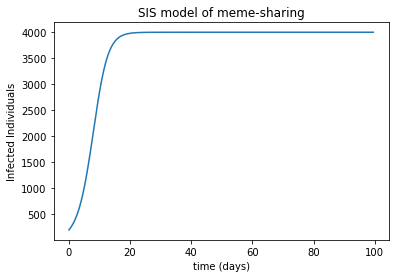

In [3]:
dt=.5
T=100
N=int(np.ceil(T/dt))
y=.2
b=.0001
I=np.zeros(N)
I[0]=200
p=6000

t=np.arange(0,T,dt)

for i in np.arange(N-1):
    I[i+1]=I[i]+dt*(b*I[i]*(p-I[i])-(y*I[i]))
    
plt.plot(t,I,label="Forward Euler Solution")
plt.xlabel("time (days)")
plt.ylabel("Infected Individuals")
plt.title("SIS model of meme-sharing")
plt.show()

After about 20 days, meme-sharing levels equilibrate at 4000 infected individuals.

### 1.2
One possible intervention involves quarantining students by taking away their internet access. This can be modeled by reducing the total population $N$, effectively removing individuals from the population. Use the same parameter values, but systematically reduce $N$ and report the changes that you observe. How many students will need to be quarantined in order to ensure that the epidemic dies out? 

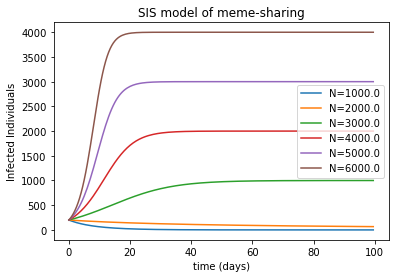

In [4]:
dt=.5
T=100
N=int(np.ceil(T/dt))
y=.2
b=.0001
I=np.zeros(N)
I[0]=200
p=np.linspace(1000,6000,6)


t=np.arange(0,T,dt)

for j in np.arange(6):
    for i in np.arange(N-1):
        I[i+1]=I[i]+dt*(b*I[i]*(p[j]-I[i])-(y*I[i]))
    
    plt.plot(t,I,label="N="+ str(p[j]))
plt.xlabel("time (days)")
plt.ylabel("Infected Individuals")
plt.title("SIS model of meme-sharing")
plt.legend()
plt.show()

To ensure that the epidemic dies out, it appears that around 4000 students (the equilibrium value with no quarantined students) will need to be quarantined.

### 1.3

Perhaps keeping that many students from the internet is not exactly practical. It also seems difficult to control to infectiousnes of the memes (the $\beta$ parameter). Perhaps we can speed up the recovery rate $\gamma$ by providing students with other meaningful activities? Using the same parameters as in the first question, systematically increase $\gamma$ and report at what values the epidemic dies out.

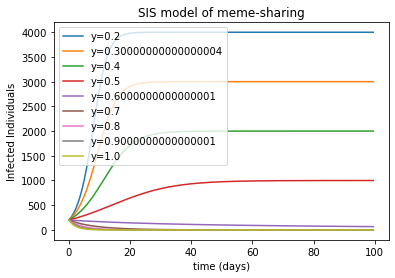

In [5]:
dt=.5
T=100
N=int(np.ceil(T/dt))
y=np.linspace(.2,1,9)
b=.0001
I=np.zeros(N)
I[0]=200
p=6000


t=np.arange(0,T,dt)

for j in np.arange(9):
    for i in np.arange(N-1):
        I[i+1]=I[i]+dt*(b*I[i]*(p-I[i])-(y[j]*I[i]))
    
    plt.plot(t,I,label="y="+ str(y[j]))
plt.xlabel("time (days)")
plt.ylabel("Infected Individuals")
plt.title("SIS model of meme-sharing")
plt.legend()
plt.show()

The epidemic begins to die out when y>.6

## Part 2: Vegetation growth and consumption model

Let us model the amount of vegetation in an ecosystem and call it $V$. This vegetation grows by itself with a logistic growth model (quadratic rate) and is consumed by herbivores with a plateauing rate (logistic function), proportional to the number of herbivores $H$.

$$ \frac{dV}{dt} = (1-\frac{V}{K})V - H\frac{1}{1 + e^{-r(V-A)}}  $$

Here $K$ is the carrying capacity of the vegetation in this environment, $r$ and $A$ are parameters of the logistic consumption function, and $H$ is the number of herbivores, which is the key parameter that we will investigate.

### 2.1
Set the values of the parameters $r=0.3$, $K=100$ and $A=10$. Let $H=0$ and calculate and plot numeric solutions of the ODE that show convergence of the solution $V(t)$ starting from different initial values. Report whether the solution converges to different equilibria. 

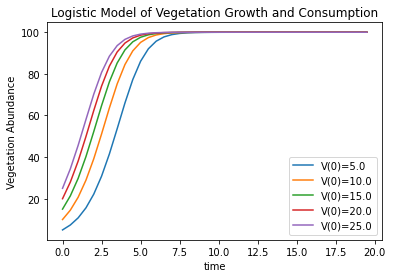

In [5]:
r=.3
k=100
A=10
H=0

dt=.5
T=20
t=np.arange(0,T,dt)
N=int(np.ceil(T/dt))
V=np.zeros(N)
V0=np.linspace(5,25,5)

for j in np.arange(5):
    V[0]=V0[j]
    for i in np.arange(N-1):
        V[i+1]=V[i]+dt*((1-V[i]/k)*V[i]-H/(1+np.exp(-r*(V[i]-A))))
    plt.plot(t,V,label="V(0)="+str(V0[j]))

plt.xlabel("time")
plt.ylabel("Vegetation Abundance")
plt.title("Logistic Model of Vegetation Growth and Consumption")
plt.legend()
plt.show()

##the solutions converge to the same equilibrium value regardless of V(0)

### 2.2
Keep the same values of the parameters $r=0.3$, $K=100$ and $A=10$. Let $H=27$ and calculate and plot numeric solutions of the ODE that show convergence of the solution $V(t)$  starting from different initial values. Report whether the solution converges to different equilibria.

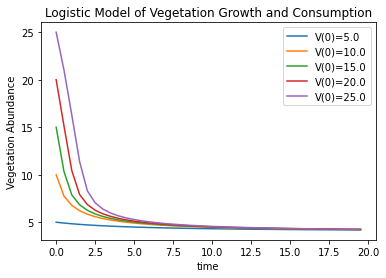

In [15]:
r=.3
k=100
A=10
H=27

dt=.5
T=20
t=np.arange(0,T,dt)
N=int(np.ceil(T/dt))
V=np.zeros(N)
V0=np.linspace(5,25,5)

for j in np.arange(5):
    V[0]=V0[j]
    for i in np.arange(N-1):
        V[i+1]=V[i]+dt*((1-V[i]/k)*V[i]-(H/(1+np.exp(-r*(V[i]-A)))))
    plt.plot(t,V,label="V(0)="+str(V0[j]))

plt.xlabel("time")
plt.ylabel("Vegetation Abundance")
plt.title("Logistic Model of Vegetation Growth and Consumption")
plt.legend()
plt.show()

##the solutions still converge to the same equilibrium value, but at a slower rate

### 2.3
Keep the same values of the parameters $r=0.3$, $K=100$ and $A=10$. Explore the range of values of $H$ between 0 (low number of herbivores) and 27 (high number of herbivores) and calculate numeric solutions of the ODE starting from different initial values. Produce a plot of solutions converging to multiple fixed points at some intermediate value $H$.

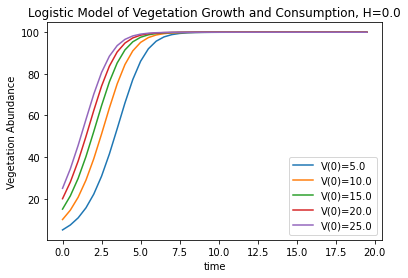

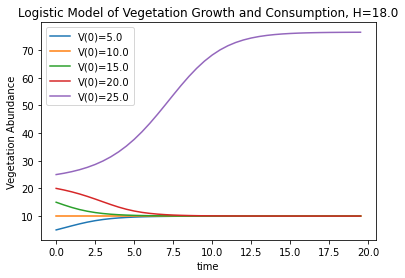

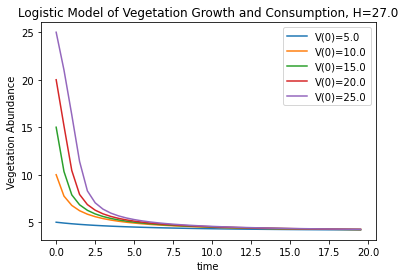

In [9]:
r=.3
k=100
A=10
H=np.zeros(3)
H[0]=0
H[1]=18
H[2]=27

dt=.5
T=20
t=np.arange(0,T,dt)
N=int(np.ceil(T/dt))
V=np.zeros(N)
V0=np.linspace(5,25,5)

for x in np.arange(3):
    for j in np.arange(5):
        V[0]=V0[j]
        for i in np.arange(N-1):
            V[i+1]=V[i]+dt*((1-V[i]/k)*V[i]-(H[x]/(1+np.exp(-r*(V[i]-A)))))
        plt.plot(t,V,label="V(0)="+str(V0[j]))
    plt.xlabel("time")
    plt.ylabel("Vegetation Abundance")
    plt.title("Logistic Model of Vegetation Growth and Consumption, H=" + str(H[x]))
    plt.legend()
    plt.show()

## Part 3: bifurcation diagrams
Use the example scripts from lab4_examples notebook to do the following:

### 3.1 
Use the SIS ODE from part 1 and produce flow diagrams of the model for two different sets of parameter values, in one where I converges to 0, and in the other where I converges to a nonzero number of infected.

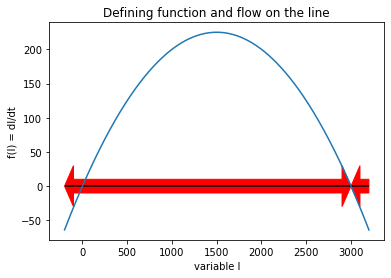

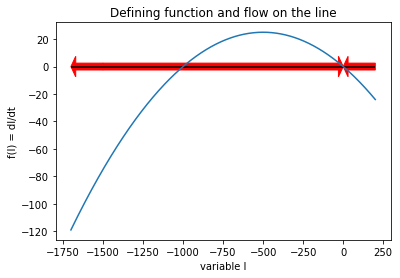

In [10]:
def def_funk(I,N,b,y):
    return(b*I*(N-I)-y*I)
N=6000
b=.0001
y1 = .3
y2=.7
margin = 200 # margin around the fixed points
xmin = 0 - margin # lower bound of x
xmax = 3000 + margin # upper bound of x
I = np.linspace(xmin, xmax, 1000) # range of values of x includes the fps
plt.plot(I, def_funk(I,N,b,y1))
plt.hlines(0, xmin,xmax) # plot the x axis
plt.arrow(xmin+margin, 0, xmax-xmin- 2*margin ,0, width = 20, head_length = 100, length_includes_head = True, color = 'red')
plt.arrow(xmin+margin, 0, -margin, 0, width = 20, head_length = 100, length_includes_head = True, color = 'red')
plt.arrow(xmax, 0, -margin, 0, width = 20, head_length = 100, length_includes_head = True, color = 'red')
plt.xlabel('variable I')
plt.ylabel('f(I) = dI/dt')
plt.title('Defining function and flow on the line')
plt.show()


xmin = -1500 - margin # lower bound of x
xmax = 0 + margin # upper bound of x
I = np.linspace(xmin, xmax, 1000) # range of values of x includes the fps
plt.plot(I, def_funk(I,N,b,y2))
plt.hlines(0, xmin,xmax) # plot the x axis
plt.arrow(xmin+margin, 0, xmax-xmin- 2*margin ,0, width = 5, head_length = 30, length_includes_head = True, color = 'red')
plt.arrow(xmin+margin, 0, -margin, 0, width = 5, head_length = 30, length_includes_head = True, color = 'red')
plt.arrow(xmax, 0, -margin, 0, width = 5, head_length = 30, length_includes_head = True, color = 'red')
plt.xlabel('variable I')
plt.ylabel('f(I) = dI/dt')
plt.title('Defining function and flow on the line')
plt.show()

### 3.2 
Use the vegetation growth ODE from part 2 and produce flow diagrams of the model for three different parameter values of $H$: low herbivores (one stable equilibrium), high herbivores (one stable equilibrium), and medium herbibores (two stable equilbria).

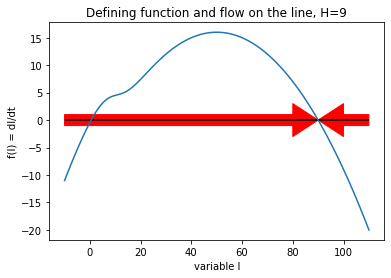

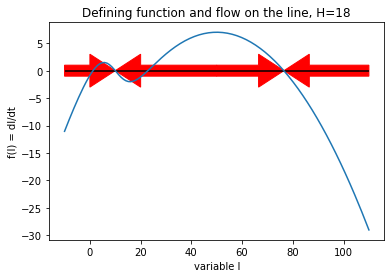

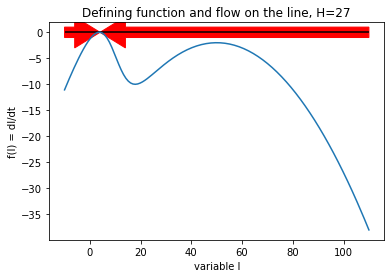

In [25]:
def def_funk(V,k,H,r,A):
    return((1-V/k)*V-H/(1+np.exp(-r*(V-A))))
r=.3
k=100
H1=9
H2=18
H3=27
A=10

#H=9
xmin = -10 # lower bound of x
xmax = 110 # upper bound of x
V = np.linspace(xmin, xmax, 100) # range of values of x includes the fps
plt.plot(V, def_funk(V,k,H1,r,A))
plt.hlines(0, xmin,xmax) # plot the x axis
plt.arrow(xmin, 0, 100 ,0, width = 2, head_length = 10, length_includes_head = True, color = 'red')
plt.arrow(xmax, 0, -20 ,0, width = 2, head_length = 10, length_includes_head = True, color = 'red')
plt.xlabel('variable I')
plt.ylabel('f(I) = dI/dt')
plt.title('Defining function and flow on the line, H=9')
plt.show()

#H=18
xmin = -10 # lower bound of x
xmax = 110 # upper bound of x
V = np.linspace(xmin, xmax, 130) # range of values of x includes the fps
plt.plot(V, def_funk(V,k,H2,r,A))
plt.hlines(0, xmin,xmax) # plot the x axis
plt.arrow(50, 0, 26.5 ,0, width = 2, head_length = 10, length_includes_head = True, color = 'red')
plt.arrow(xmax,0,-33.5,0,width = 2, head_length = 10, length_includes_head = True, color = 'red')
plt.arrow(50, 0, -40 ,0, width = 2, head_length = 10, length_includes_head = True, color = 'red')
plt.arrow(xmin,0,20,0,width = 2, head_length = 10, length_includes_head = True, color = 'red')
plt.xlabel('variable I')
plt.ylabel('f(I) = dI/dt')
plt.title('Defining function and flow on the line, H=18')
plt.show()


#H=27
xmin = -10 # lower bound of x
xmax = 110 # upper bound of x
V = np.linspace(xmin, xmax, 130) # range of values of x includes the fps
plt.plot(V, def_funk(V,k,H3,r,A))
plt.hlines(0, xmin,xmax) # plot the x axis
plt.arrow(xmin, 0, 14 ,0, width = 2, head_length = 10, length_includes_head = True, color = 'red')
plt.arrow(xmax, 0, -106, 0, width = 2, head_length = 10, length_includes_head = True, color = 'red')
plt.xlabel('variable I')
plt.ylabel('f(I) = dI/dt')
plt.title('Defining function and flow on the line, H=27')
plt.show()

### 3.3 
Produce bifurcation diagrams of the SIS ODE model using the numeric approach illustrated in the example code. You can use either parameter $\beta$ or $\gamma$, but it needs should cover a range of the parameter to illustrate the bifurcations that occur. Classify the bifurcations that you observe.

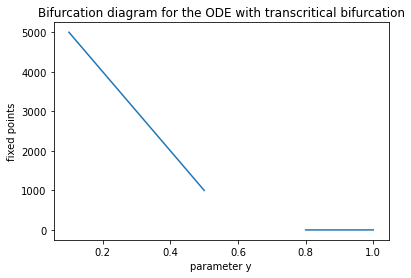

In [10]:
def def_funk(b,I,N,y):
    return(b*I*(N-I)-y*I)

b=.0001
N=6000


def converged_value(y, x0, dt, T): 
    # inputs: parameter, initial value, time step, and duration
    Niter = int(np.ceil(T/dt)) # determine the number of iterations
    x = np.zeros(Niter) # preallocate the solution array
    x[0] = x0 # set the initial value
    t = np.arange(0,T,dt) # preallocate the time array
    #Do the Euler!
    for i in np.arange(Niter-1):
        x[i+1] = x[i] + dt*def_funk(b,x[i],N,y) #this is the FE step
    if np.isclose(x[Niter-1],x[Niter-2])&np.isfinite(x[Niter-1]): 
        # if the last two values are close and not infinite!
        return(x[Niter-1]) # return the last value
    else:
        return(np.nan) # return no value
y=np.linspace(.1,1,10) # set range of parameter values
fps = np.zeros(len(y)) # initialize array of fixed points
x0 = 200 # initial value
dt = 0.01 # time step
T = 100 # duration
for i in np.arange(len(y)): 
    # calculate coverged values and store them in fps array
    fps[i] = converged_value(y[i],x0,dt,T) 
plt.plot(y,fps)
plt.xlabel('parameter y')
plt.ylabel('fixed points')
plt.title('Bifurcation diagram for the ODE with transcritical bifurcation')
plt.show() 

###this is a transcritical bifurcation at y=.6

### 3.4 (optional)
Do the same for the vegetation model, for a range of parameter $H$ that illustrates the bifuractions that occur. Classify the bifurcations that you observe.